<h2>A-B Testing and Statistical Analysis on Employee Attrition Dataset</h2>

<b>Introduction</b>
<p>I sought this dataset because one of my passions is improvong employee and customer relations using data science(in this particular case employee data). This research focuses on observing several relationships between attrition at the workplace and other factors such as age, gender, education level, salary and so on. Particularly, I implement A-B testing and utilize metrics such as the t-test, 3 way ANOVA( Analysis of Variance) to determine if the test is statistically significant and whether the null hypothesis is rejected. If so then our findings are valid statistically. The hypothesis for this experiment is: <b>Are Married people more likely to be satisfied with their jobs compared to Single people?</b> The purpose of this is to use data and statistical knowledge to explore these trends which may not always be conspicuous in order to help managers and employers better address these issues (if any). It is also a classical example of application of A-B testing.The target variable is the atttition which has 3 classes; single, married and divorced. For my analysis, I mostly focused on single vs married employees. The dataset contains 1470 observations and 25 features.</p>

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

!pip install seaborn==0.9.0
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [0]:
#import the data
data=pd.read_csv(r'https://raw.githubusercontent.com/ssembahen/saved_files/master/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [0]:
#visualize
print(data.head())
print(data['MaritalStatus'].unique())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

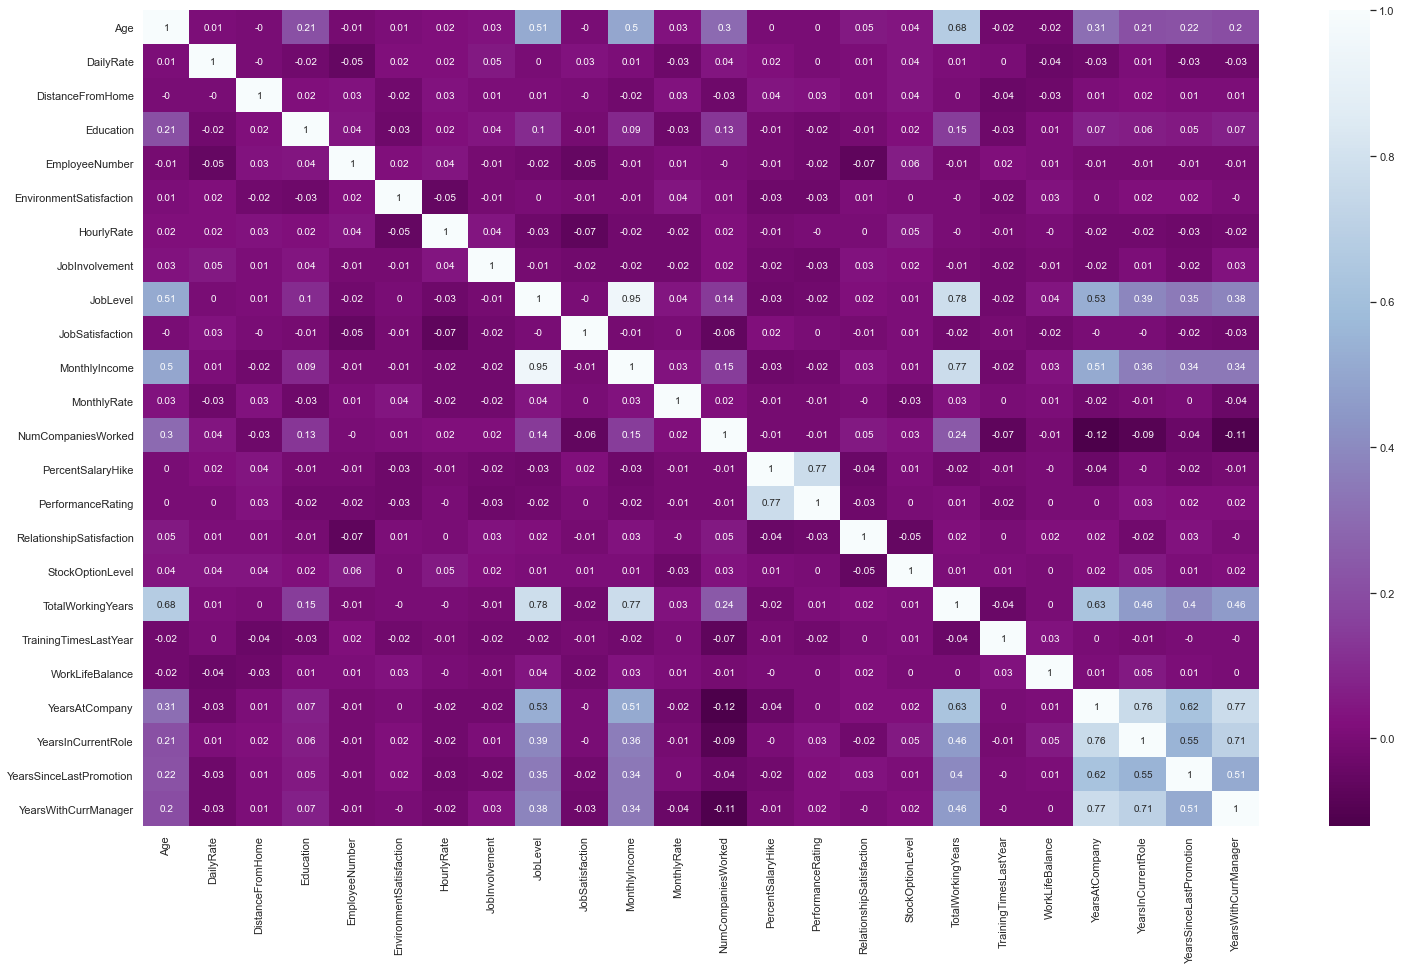

In [0]:
#Use a heatmap to visualize the correlation
data=data.drop(['EmployeeCount',"StandardHours"], axis=1)
plt.figure(figsize=(25,15))
sns.heatmap(data.corr().round(2), cmap="BuPu_r", annot=True)

In [0]:
#describe the data
#checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate           

In [0]:
# view the columns
data.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [0]:
#numeric columns
numeric_data=data._get_numeric_data()
numeric_data

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,2062,4,42,2,3,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2064,2,87,4,2,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,2065,4,63,2,2,2,...,3,4,0,17,3,2,9,6,0,8


In [0]:
# Size of Single, Married, and Divorced populations
print('single sample size:', len(data[data.MaritalStatus=='Single']))
print('married sample size:', len(data[data.MaritalStatus=='Married']))
print('divorced sample size:', len(data[data.MaritalStatus=='Divorced']))

single sample size: 470
married sample size: 673
divorced sample size: 327


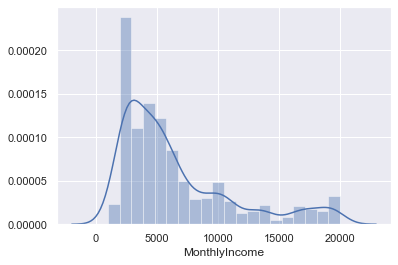

In [0]:
#A histogram for monthly income
ax = sns.distplot(data['MonthlyIncome'])

Distribution of monthly income

In [0]:
# Assign 1 for Attrition=Yes and 0 for Attrition=No
check={"Yes":1,"No":0}
data['AttritionCheck']=data['Attrition'].map(check)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionCheck
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,1,6,3,3,2,2,2,2,0


In [0]:
# What is the attrition rate among single and married populations
print('Single attrition rate:', data[data.MaritalStatus=='Single'].AttritionCheck.mean())
print('Married attrition rate:', data[data.MaritalStatus=='Married'].AttritionCheck.mean())
print('Divorced attrition rate:', data[data.MaritalStatus=='Divorced'].AttritionCheck.mean())

Single attrition rate: 0.2553191489361702
Married attrition rate: 0.12481426448736999
Divorced attrition rate: 0.10091743119266056


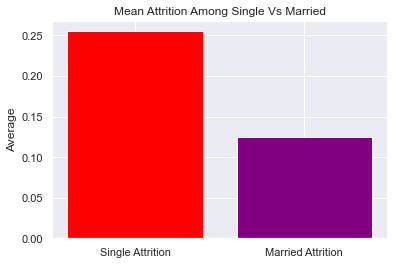

In [0]:
#Mean distribution of attrition among single and married populations.
#import plotly.express as px
single_attrition_mean=data[data.MaritalStatus=='Single'].AttritionCheck.mean()
married_attrition_mean=data[data.MaritalStatus=='Married'].AttritionCheck.mean()
height=(single_attrition_mean,married_attrition_mean)
bars=("Single Attrition","Married Attrition")
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['red', 'purple'])
plt.xticks(y_pos, bars)
plt.title('Mean Attrition Among Single Vs Married')
plt.ylabel('Average')
plt.show()



Conduct a t-test to determine if the 2 samples(single vs married) are statistically significant.

In [0]:
#Is there a significant difference between the single and married group with regard to attrition?
stats.ttest_ind(data[data.MaritalStatus=='Single'].AttritionCheck,
                data[data.MaritalStatus=='Married'].AttritionCheck)

Ttest_indResult(statistic=5.746092971896814, pvalue=1.170858376726938e-08)

We have a p-value of less than 0.0001. Thus the null hypothesis is rejected. I went ahead to investigate by way of visualizations and other statistics why attrition was higher among the single employees compared to the married populations. 

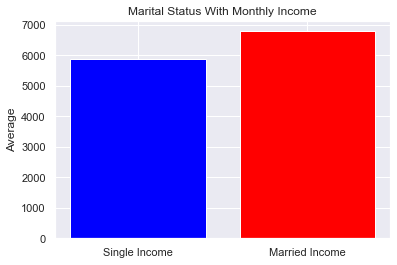

In [0]:
#Marital Status by Monthly Income Bar Plot
single_monthlyincome_mean=data[data.MaritalStatus=='Single'].MonthlyIncome.mean()
married_monthlyincome_mean=data[data.MaritalStatus=='Married'].MonthlyIncome.mean()
height=(single_monthlyincome_mean,married_monthlyincome_mean)
bars=("Single Income","Married Income")
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['blue', 'red'])
plt.xticks(y_pos, bars)
plt.title('Marital Status With Monthly Income')
plt.ylabel('Average')
plt.show()



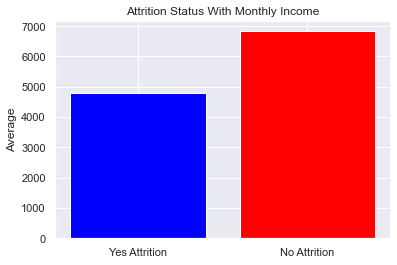

In [0]:
# Monthly Income With Attrition Rate Bar Plot
yesattr_monthlyincome_mean=data[data.Attrition=='Yes'].MonthlyIncome.mean()
noattr_monthlyincome_mean=data[data.Attrition=='No'].MonthlyIncome.mean()
height=(yesattr_monthlyincome_mean,noattr_monthlyincome_mean)
bars=("Yes Attrition","No Attrition")
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['blue', 'red'])
plt.xticks(y_pos, bars)
plt.title('Attrition Status With Monthly Income')
plt.ylabel('Average')
plt.show()


Text(0, 0.5, 'Marital status')

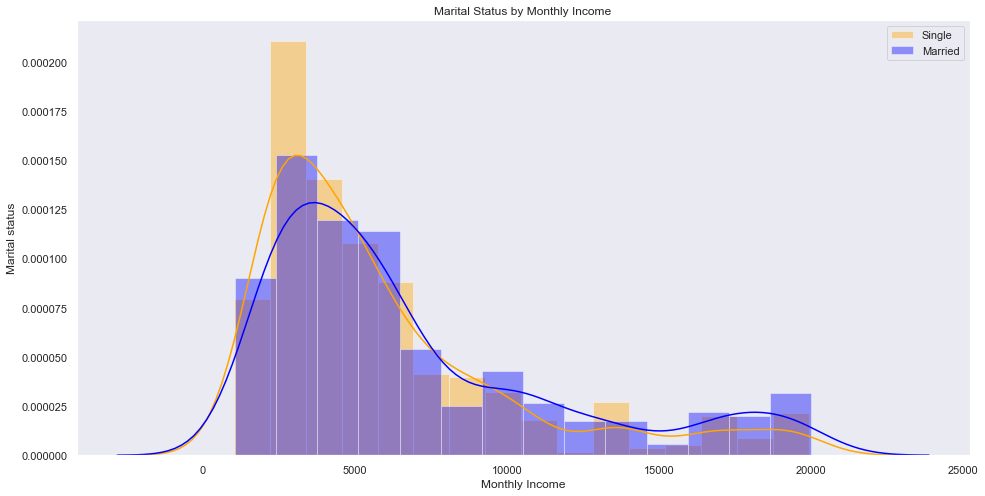

In [0]:
#Why is the attrition rate high among single>married>Divorced
#Check monthly income
#Could be a factor. We see that in the lower income bracket, the majority are single. 
#However for the higher incomes, married people are more dominant.
data_single=data.loc[data['MaritalStatus']=='Single']
data_married=data.loc[data['MaritalStatus']=='Married']


plt.figure(figsize=(16,8))
sns.distplot(data_single[['MonthlyIncome']],color='orange',label="Single", hist_kws={'alpha':.4})
sns.distplot(data_married[['MonthlyIncome']],color='blue',label="Married", hist_kws={'alpha':.4})

plt.grid()
plt.title('Marital Status by Monthly Income')
plt.legend()
plt.xlabel('Monthly Income')
plt.ylabel('Marital status')


Text(0, 0.5, 'Attrition')

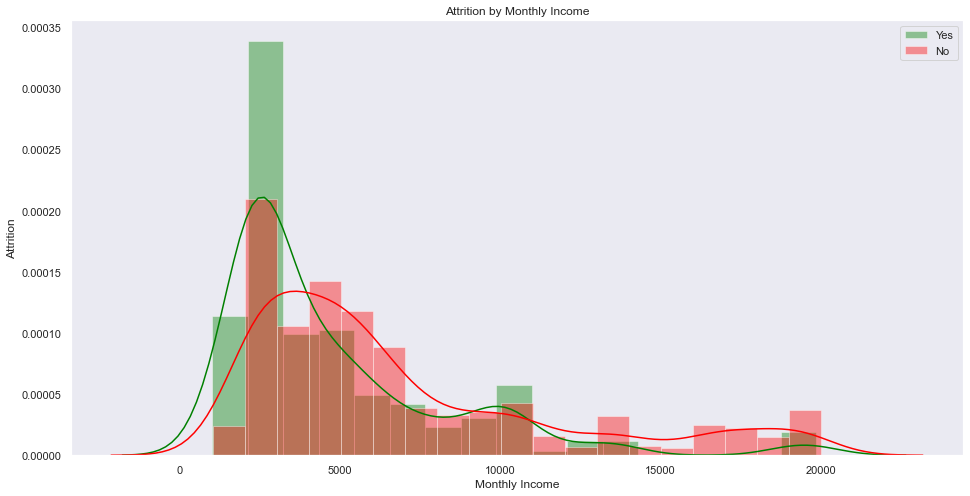

In [0]:
#We saw before that married people generally make more than single employees.
#Now let's look at the attrition
#Check Attrition vs Monthly income
#We see attrition rate going down with higher income
attrition_yes=data.loc[data['Attrition']=='Yes']
attrition_no=data.loc[data['Attrition']=='No']

plt.figure(figsize=(16,8))
sns.distplot(attrition_yes[['MonthlyIncome']],color='green',label="Yes", hist_kws={'alpha':.4})
sns.distplot(attrition_no[['MonthlyIncome']],color='red',label="No", hist_kws={'alpha':.4})
plt.grid()
plt.title('Attrition by Monthly Income')
plt.legend()
plt.xlabel('Monthly Income')
plt.ylabel('Attrition')


Text(0, 0.5, 'Marital status')

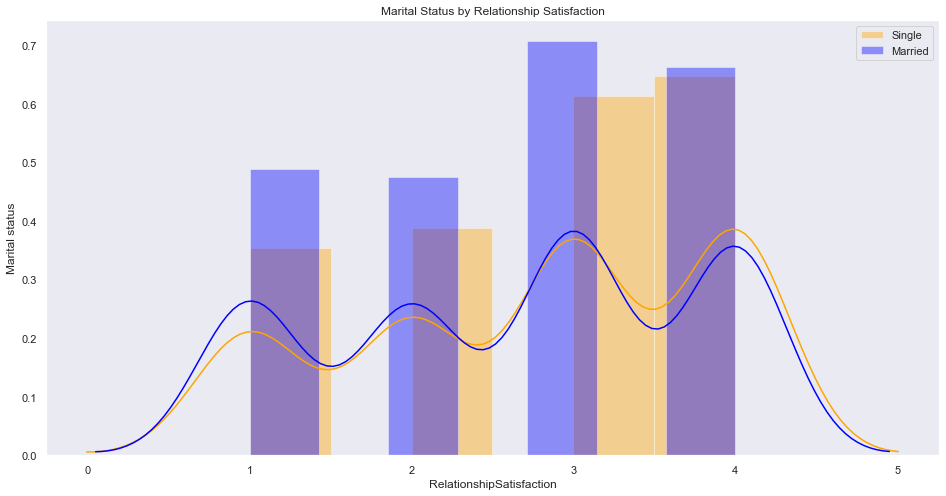

In [0]:
#Relationship satisfaction didn't seem to play a contribution as it was relatively the same
data_single=data.loc[data['MaritalStatus']=='Single']
data_married=data.loc[data['MaritalStatus']=='Married']


plt.figure(figsize=(16,8))
sns.distplot(data_single[['RelationshipSatisfaction']],color='orange',label="Single", hist_kws={'alpha':.4})
sns.distplot(data_married[['RelationshipSatisfaction']],color='blue',label="Married", hist_kws={'alpha':.4})

plt.grid()
plt.title('Marital Status by Relationship Satisfaction')
plt.legend()
plt.xlabel('RelationshipSatisfaction')
plt.ylabel('Marital status')



Text(0, 0.5, 'Marital status')

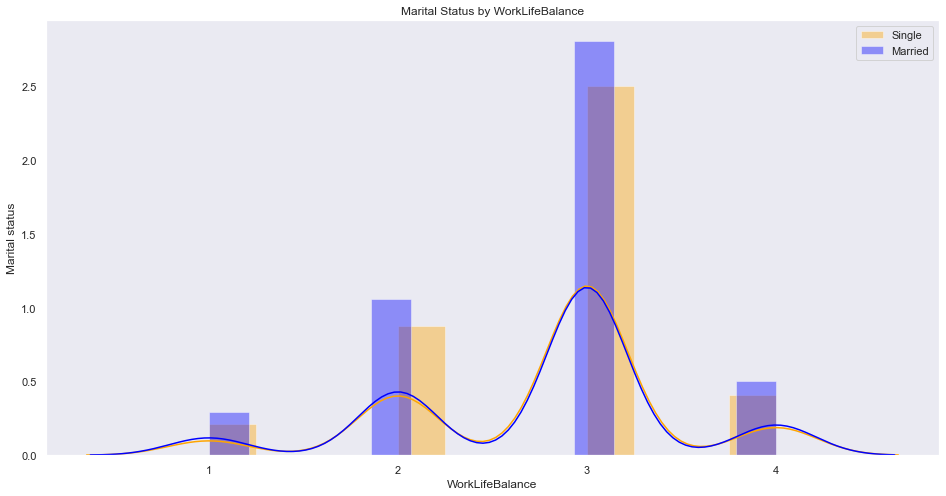

In [0]:
#Check work-life balance
#Still does not tell a good story
# Work-life balance also was not a diffenertiating factor as it was constant among the 2 samples.
data_single=data.loc[data['MaritalStatus']=='Single']
data_married=data.loc[data['MaritalStatus']=='Married']


plt.figure(figsize=(16,8))
sns.distplot(data_single[['WorkLifeBalance']],color='orange',label="Single", hist_kws={'alpha':.4})
sns.distplot(data_married[['WorkLifeBalance']],color='blue',label="Married", hist_kws={'alpha':.4})

plt.grid()
plt.title('Marital Status by WorkLifeBalance')
plt.legend()
plt.xlabel('WorkLifeBalance')
plt.ylabel('Marital status')

Text(0, 0.5, 'Marital status')

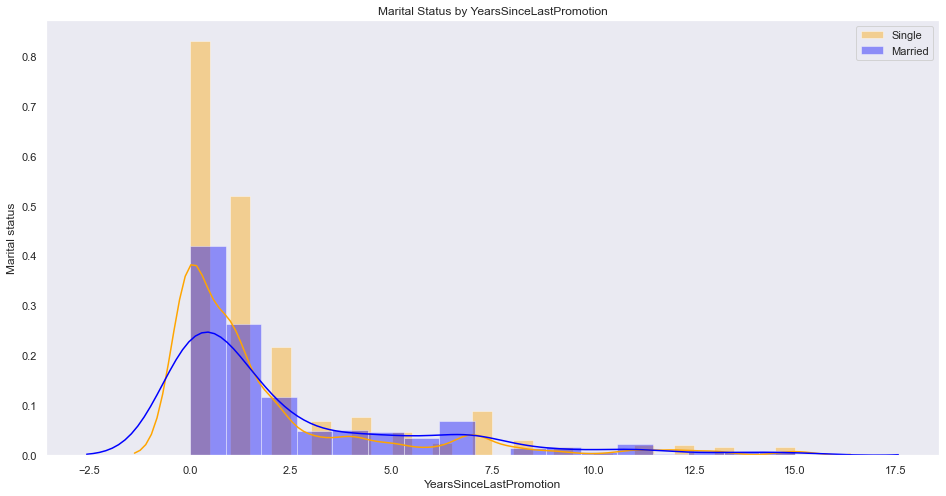

In [0]:
# consider YearsSinceLastPromotion
#Also does not clearly explain
data_single=data.loc[data['MaritalStatus']=='Single']
data_married=data.loc[data['MaritalStatus']=='Married']


plt.figure(figsize=(16,8))
sns.distplot(data_single[['YearsSinceLastPromotion']],color='orange',label="Single", hist_kws={'alpha':.4})
sns.distplot(data_married[['YearsSinceLastPromotion']],color='blue',label="Married", hist_kws={'alpha':.4})

plt.grid()
plt.title('Marital Status by YearsSinceLastPromotion')
plt.legend()
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('Marital status')

Text(0, 0.5, 'Marital status')

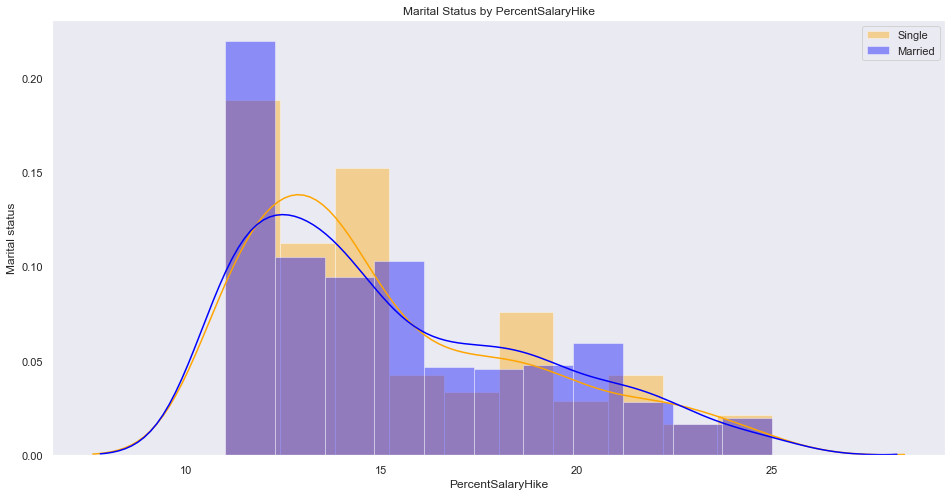

In [0]:

#Percent Salary Hike
#The percent salary hike also seemed not to play a major part
data_single=data.loc[data['MaritalStatus']=='Single']
data_married=data.loc[data['MaritalStatus']=='Married']


plt.figure(figsize=(16,8))
sns.distplot(data_single[['PercentSalaryHike']],color='orange',label="Single", hist_kws={'alpha':.4})
sns.distplot(data_married[['PercentSalaryHike']],color='blue',label="Married", hist_kws={'alpha':.4})

plt.grid()
plt.title('Marital Status by PercentSalaryHike')
plt.legend()
plt.xlabel('PercentSalaryHike')
plt.ylabel('Marital status')

Text(0, 0.5, 'Marital status')

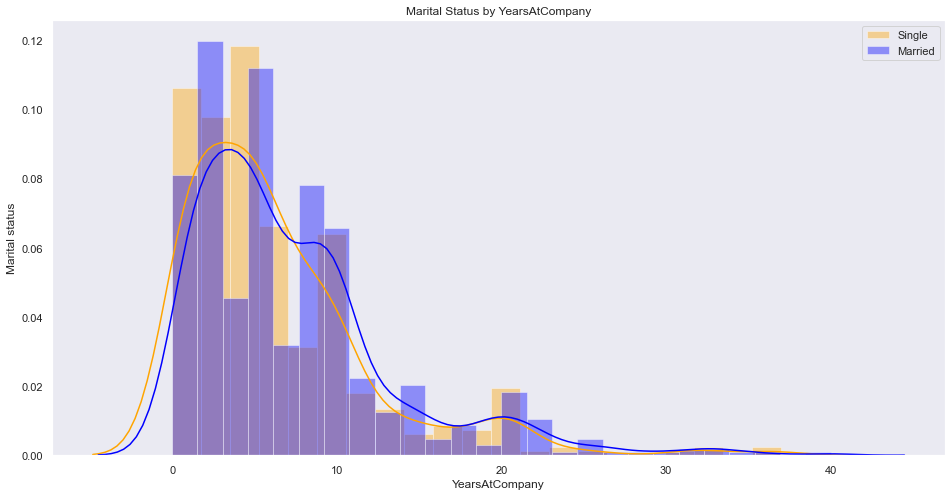

In [0]:
#Years at company Generally, married employees have been working longer at the company compared to 
#single employees.

data_single=data.loc[data['MaritalStatus']=='Single']
data_married=data.loc[data['MaritalStatus']=='Married']


plt.figure(figsize=(16,8))
sns.distplot(data_single[['YearsAtCompany']],color='orange',label="Single", hist_kws={'alpha':.4})
sns.distplot(data_married[['YearsAtCompany']],color='blue',label="Married", hist_kws={'alpha':.4})

plt.grid()
plt.title('Marital Status by YearsAtCompany')
plt.legend()
plt.xlabel('YearsAtCompany')
plt.ylabel('Marital status')

Text(0, 0.5, 'Marital status')

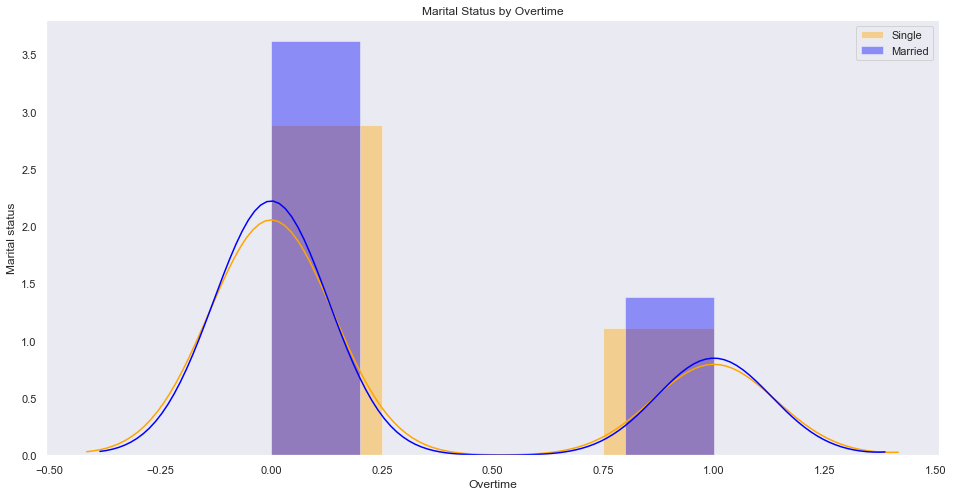

In [0]:
#Overtime
#Also does not clearly explain the hypothesis
check={"Yes":1,"No":0}
data['OverTimeCheck']=data['OverTime'].map(check)

data_single=data.loc[data['MaritalStatus']=='Single']
data_married=data.loc[data['MaritalStatus']=='Married']


plt.figure(figsize=(16,8))
sns.distplot(data_single[['OverTimeCheck']],color='orange',label="Single", hist_kws={'alpha':.4})
sns.distplot(data_married[['OverTimeCheck']],color='blue',label="Married", hist_kws={'alpha':.4})

plt.grid()
plt.title('Marital Status by Overtime')
plt.legend()
plt.xlabel('Overtime')
plt.ylabel('Marital status')

In [0]:
Some contributing factors to higher attrition among single vs married are Monthly Income, Percent Salary Hike and Years at company. This could inadvertently mean that there is a higher percantage of married people who have been working longer at the company, thus are having a higher salary and are getting slightly better salary increase.

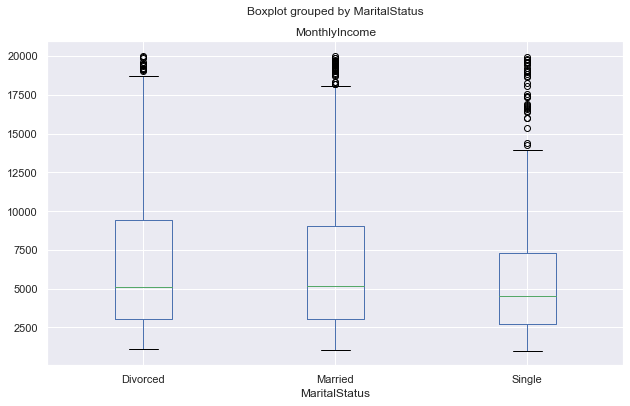

In [0]:
# Box plot for monthly income
#When you compare the box plots for the single vs married. The trend suggests that
#more married employees tend to make more than the single employees
data.boxplot('MonthlyIncome', by='MaritalStatus', figsize=(10,6) )

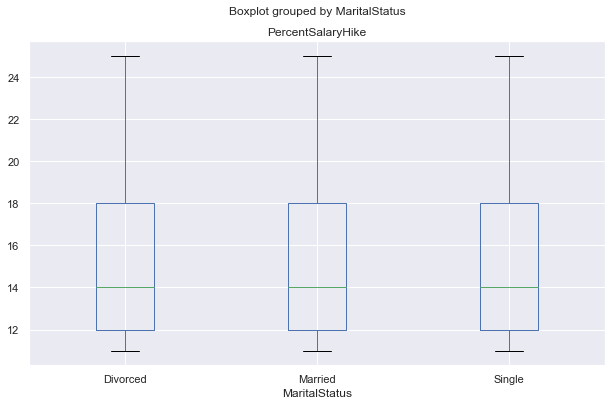

In [0]:
#Box plot for percent salary hike
#This did not play a major role as they are comparatively similar
data.boxplot('PercentSalaryHike', by='MaritalStatus', figsize=(10,6) )


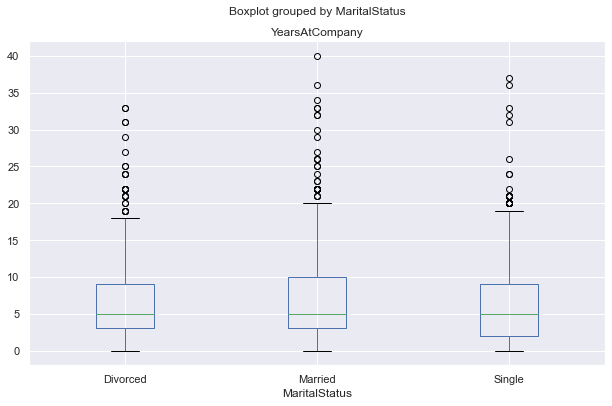

In [0]:
#Years at company
#Boxplot
#we see that more married people tend to have spent more years at the company
data.boxplot('YearsAtCompany', by='MaritalStatus', figsize=(10,6) )


In [0]:
#Anova
# I conducted the 3 -way ANOVA statistical test to investitae whether there is a difference in means
#among the single, married and divorced,
# The p-value is 0.002 so the 3 samples are statistically significant
Single = data[data['MaritalStatus'] == 'Single']
Married = data[data['MaritalStatus'] == 'Married']
Divorced = data[data['MaritalStatus'] == 'Divorced']
stats.f_oneway(Single['MonthlyIncome'], Married['MonthlyIncome'], Divorced['MonthlyIncome'])

F_onewayResult(statistic=5.904753323759054, pvalue=0.002791675956684596)

In [0]:
#Effect size is a statistical concept that measures the strength
# of the relationship between two variables on a numeric scale.
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionCheck,OverTimeCheck
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,0,8,0,1,6,4,0,5,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,1,10,3,3,10,7,1,7,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,0,7,3,3,0,0,0,0,1,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,0,8,3,3,8,7,3,0,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,1,6,3,3,2,2,2,2,0,0


<b>Summary</b>
<p>With the ever-growing competition levels among companies, it is rather imperative that the workforce is not only skilled, but also that all parameters that engender attrition are mitigated. This ultimately could improve productivity and reduce downtime. That was my inspiration to work with this dataset. My hypothesis was:<b>Are Married employees more likely to be satisfied with their jobs compared to Single employees?</b> Through the t-test, I obtained a p-value less than 0.001 which meant that there was a statistically significant differences in means between the 2 groups. Additionally, my investigation concluded that indeed the mean attrition rate was 13% higher amond the single population than the married employees. This was an anomaly. On further investigation, I looked at other factors such as monthly income, salary increase, years at company and these factors revealed that generally more married employess tended to be older, have been working longer, making more money , and inadvertently showed lower attrition rates. This was actually a classical example of the importance of using analytics to investigate cause because taking the disparity at face value without further investigation might have proved misleading.</p>